In [13]:
import pandas as pd
import os

# У нас есть статистика продаж за 12 месяцев и нам нужно проанализировать их

## Первым делом объединям все 12 файлов в один файл

In [14]:
df = pd.read_csv('/Users/amirhan/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_April_2019.csv')
files = [file for file in os.listdir('/Users/amirhan/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/')]

all_month_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('/Users/amirhan/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/'+file)
    all_month_data = pd.concat([all_month_data, df])
all_month_data.tail(5)
        

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"
13621,222909,AAA Batteries (4-pack),1,2.99,06/25/19 14:33,"209 11th St, Atlanta, GA 30301"


### Почистим данные от мусора

In [15]:
# Удалим Null значения
nan_df = all_month_data[all_month_data.isna().any(axis=1)]
all_date = pd.DataFrame
all_data = all_month_data.dropna(how='all') #how='all' означает что мы удаляем строки где все значения null

### Теперь нужно удалить значения 'or'

In [16]:
temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or'] #мы нашли все мусорные данные
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
254,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
705,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1101,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2875,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3708,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [17]:
# теперь удаляем не нужные данные
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


## Вопрос 1 : Посчтитать за какой месяц было больше всего выручки

In [18]:
#Для начала создадим столбец с месяцами, чтоб было лечге вести рассчет
all_month_data['Month'] = all_month_data['Order Date'].str[0:2]
all_month_data.tail(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
13612,222901,AAA Batteries (4-pack),1,2.99,06/11/19 04:00,"891 South St, Atlanta, GA 30301",06
13613,222902,Lightning Charging Cable,1,14.95,06/10/19 17:43,"847 Main St, Atlanta, GA 30301",06
13614,222903,iPhone,1,700,06/07/19 22:21,"685 Hickory St, New York City, NY 10001",06
13615,222903,Lightning Charging Cable,1,14.95,06/07/19 22:21,"685 Hickory St, New York City, NY 10001",06
13616,222904,Macbook Pro Laptop,1,1700,06/09/19 22:07,"975 2nd St, Los Angeles, CA 90001",06
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",06
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",06
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",06
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",06
13621,222909,AAA Batteries (4-pack),1,2.99,06/25/19 14:33,"209 11th St, Atlanta, GA 30301",06


In [27]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32') #перевели столбец Месяц в формат int
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sum_order,Month
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",1700.00,12
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",600.00,12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",11.95,12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",149.99,12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",11.95,12


In [20]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int32') #нужно перевести STR в INT
all_data['Price Each'] = all_data['Price Each'].astype('float64') #переведем в другой формат 
all_data['sum_order'] = all_data['Quantity Ordered'] * all_data['Price Each']

In [21]:
all_data['Price Each'] = all_data['Price Each'].astype('float64') #переведем в другой формат 

In [29]:
df_temp_sum = all_data[['Month', 'sum_order']].groupby('Month').sum().sort_values('sum_order', ascending=False).reset_index()
df_temp_sum


,Month,sum_order
0,12,4613443.34
1,10,3736726.88
2,4,3390670.24
3,11,3199603.20
4,5,3152606.75
5,3,2807100.38
6,7,2647775.76
7,6,2577802.26
8,8,2244467.88
9,2,2202022.42


### Визуализируем данные

In [31]:
import matplotlib.pylab as plt

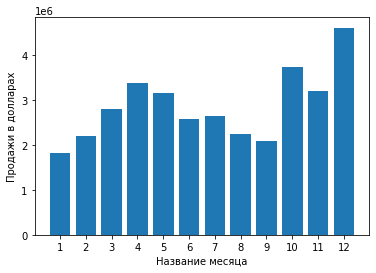

In [33]:
plt.bar(df_temp_sum['Month'], df_temp_sum['sum_order']) # months - x values, df_temp... - y value
plt.xticks(df_temp_sum['Month']) #show us all numbers from 1 to 12
plt.ylabel('Продажи в долларах') # даем название y
plt.xlabel('Название месяца')
plt.show()
    

## Вопрос №2. В каком городе было больше всего продаж?

## Добавляем отдельно колонку с названием городов

In [87]:
# Разделяем строку слобца на части и выставкиваем оттуда название города
def get_city(address):  #создаем функцию, которая разделяет значения с запятой на части
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1] #добавляем еще и штат взяв лишь обозначение без zip code

all_data['city_name'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' (' + get_state(x)+ ')')
all_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sum_order,city_name
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6,2.99,Boston (MA)
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",6,149.99,New York City (NY)
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco (CA)
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco (CA)
13621,222909,AAA Batteries (4-pack),1,2.99,06/25/19 14:33,"209 11th St, Atlanta, GA 30301",6,2.99,Atlanta (GA)


In [92]:
df_temp_sum_city = all_data[['city_name', 'sum_order']].groupby('city_name').sum()
df_temp_sum_city.sort_values(by = 'sum_order', ascending=False)

,sum_order
city_name,
San Francisco (CA),8262203.91
Los Angeles (CA),5452570.80
New York City (NY),4664317.43
Boston (MA),3661642.01
Atlanta (GA),2795498.58
Dallas (TX),2767975.40
Seattle (WA),2747755.48
Portland (OR),1870732.34
Austin (TX),1819581.75


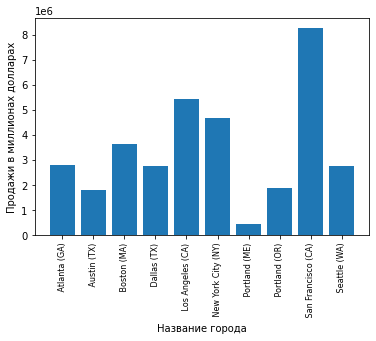

In [101]:
city_ = [city for city, df in all_data.groupby('city_name')]

plt.bar(city_, df_temp_sum_city['sum_order']) # months - x values, df_temp... - y value
plt.xticks(city_, rotation='vertical', size=8) #show us all numbers from 1 to 12
plt.ylabel('Продажи в миллионах долларах') # даем название y
plt.xlabel('Название города')
plt.show()

## Вопрос №3. В какое время больше всего продаж?

In [102]:
# переведем строку order date в формат date
%time
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


In [109]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sum_order,city_name,Hour,Minutes
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38


In [108]:
# создадим новую строку для выявления в каком часов диапозоне больше продаж
all_data['Hour'] = all_data['Order Date'].dt.hour #dt сокращенно от datetime для работы с временным форматом
all_data['Minutes'] = all_data['Order Date'].dt.minute

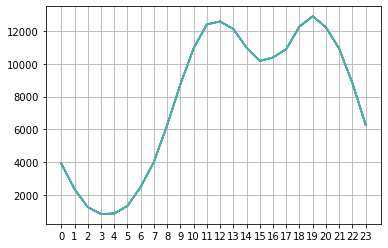

In [116]:
hour = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hour, all_data.groupby(['Hour']).count())
plt.xticks(hour)
plt.grid()
plt.show()

## Вопрос №4. Какие продукты чаще продаются друг с другом?

In [120]:
df = all_data[all_data['Order ID'].duplicated(keep=False)] #выводим только дубликаты в вывод

df['Groped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x)) # создаем новый столбец с дубликатами

df.head()

/var/folders/0b/rfzwkbw94z36w4d3xrxrx1600000gn/T/ipykernel_4278/2999733191.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Groped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x)) # создаем новый столбец с дубликатами


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sum_order,city_name,Hour,Minutes,Groped
16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,Boston (MA),12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.95,Boston (MA),12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,99.99,Boston (MA),12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.99,Boston (MA),12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,400.00,New York City (NY),14,32,"Vareebadd Phone,USB-C Charging Cable"


In [123]:
# теперь нужно удалить дубликаты 
df = df[['Order ID', 'Groped']].drop_duplicates()
df.head(100)

,Order ID,Groped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"
...,...,...
2297,297847,"iPhone,Lightning Charging Cable"
2345,297894,"USB-C Charging Cable,AA Batteries (4-pack)"
2347,297895,"USB-C Charging Cable,27in FHD Monitor"
2398,297945,"Vareebadd Phone,USB-C Charging Cable,Bose Soun..."


In [130]:
# теперь нужно подсчитать какая комбинация встречается чаще всего 
# для этого ипортируем две функции из библиотек 
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Groped']:
    row_list = row.split(',') # показываем, чем разделяются продукты
    count.update(Counter(combinations(row_list, 2))) # 2 - количество продуктов в groped
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


## Вопрос №5. Какой продукт самый продаваемый и почему?

In [136]:
product_group = all_data.groupby('Product') #групируем по товарам
sum_prod_order = product_group.sum()['Quantity Ordered'] #считаем сумму товаров 


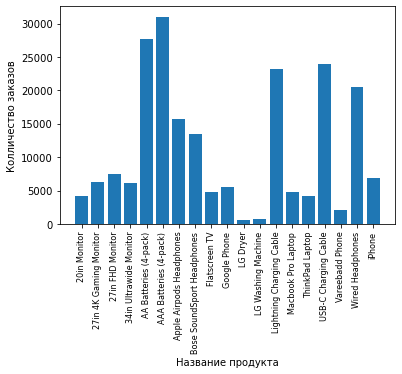

In [144]:
# сделаем график 
product_ = [product for product, df in product_group['Product']]

plt.bar(product_, sum_prod_order) # months - x values, df_temp... - y value
plt.xticks(product_, rotation='vertical', size=8) #show us all numbers from 1 to 12
plt.ylabel('Колличество заказов') # даем название y
plt.xlabel('Название продукта')
plt.show()


### Какая корреляция между ценой и колличество продаж товара?

/var/folders/0b/rfzwkbw94z36w4d3xrxrx1600000gn/T/ipykernel_4278/1524424145.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product_, rotation='vertical', size=8)


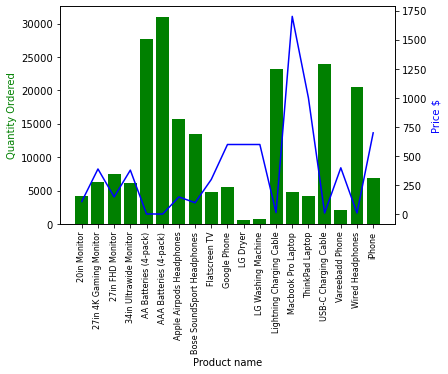

In [151]:
prices = all_data.groupby('Product').mean()['Price Each'] #узнаем цену товара по категориям 

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(product_, sum_prod_order, color = 'g')
ax2.plot(product_, prices, 'b-')

ax1.set_xlabel('Product name')
ax1.set_ylabel('Quantity Ordered', color = 'g')

ax2.set_ylabel('Price $', color = 'b')
ax1.set_xticklabels(product_, rotation='vertical', size=8)

plt.show()